In [1]:
#import the necessary libaries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn import metrics 
import seaborn as sns
import scikitplot as skl
sns.set()

#loading the dataset
data = sm.datasets.fair.load_pandas().data

#print the first 5 rows of the dataframe
data.head(5)

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,0.111111
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,3.230769
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1.400000
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,0.727273
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,4.666666


## Basic EDA and Statistical Analysis

In [2]:
# gives information about the data types,columns, null value counts, memory usage etc
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6366 entries, 0 to 6365
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   rate_marriage    6366 non-null   float64
 1   age              6366 non-null   float64
 2   yrs_married      6366 non-null   float64
 3   children         6366 non-null   float64
 4   religious        6366 non-null   float64
 5   educ             6366 non-null   float64
 6   occupation       6366 non-null   float64
 7   occupation_husb  6366 non-null   float64
 8   affairs          6366 non-null   float64
dtypes: float64(9)
memory usage: 447.7 KB


In [3]:
data['affairs']=(data['affairs']>0).astype(int)

In [4]:
#let's see basic statistics details about data
data.describe()

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
count,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000,6366.000000
mean,4.109645,29.082862,9.009425,1.396874,2.426170,14.209865,3.424128,3.850141,0.322495
std,0.961430,6.847882,7.280120,1.433471,0.878369,2.178003,0.942399,1.346435,0.467468
min,1.000000,17.500000,0.500000,0.000000,1.000000,9.000000,1.000000,1.000000,0.000000
25%,4.000000,22.000000,2.500000,0.000000,2.000000,12.000000,3.000000,3.000000,0.000000
50%,4.000000,27.000000,6.000000,1.000000,2.000000,14.000000,3.000000,4.000000,0.000000
75%,5.000000,32.000000,16.500000,2.000000,3.000000,16.000000,4.000000,5.000000,1.000000
max,5.000000,42.000000,23.000000,5.500000,4.000000,20.000000,6.000000,6.000000,1.000000


In [5]:
#missing values
data.isnull().sum()

rate_marriage      0
age                0
yrs_married        0
children           0
religious          0
educ               0
occupation         0
occupation_husb    0
affairs            0
dtype: int64

0    4313
1    2053
Name: affairs, dtype: int64


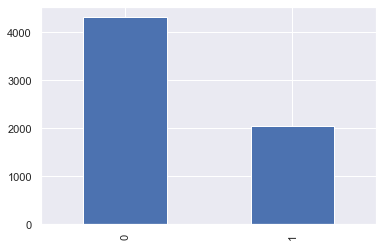

In [6]:
print(data.affairs.value_counts())
data.affairs.value_counts().plot(kind='bar')

The above graph shows that the data is biased towards datapoints having affairs valus as 0. The number of no affairs is almost twice the number of affairs.

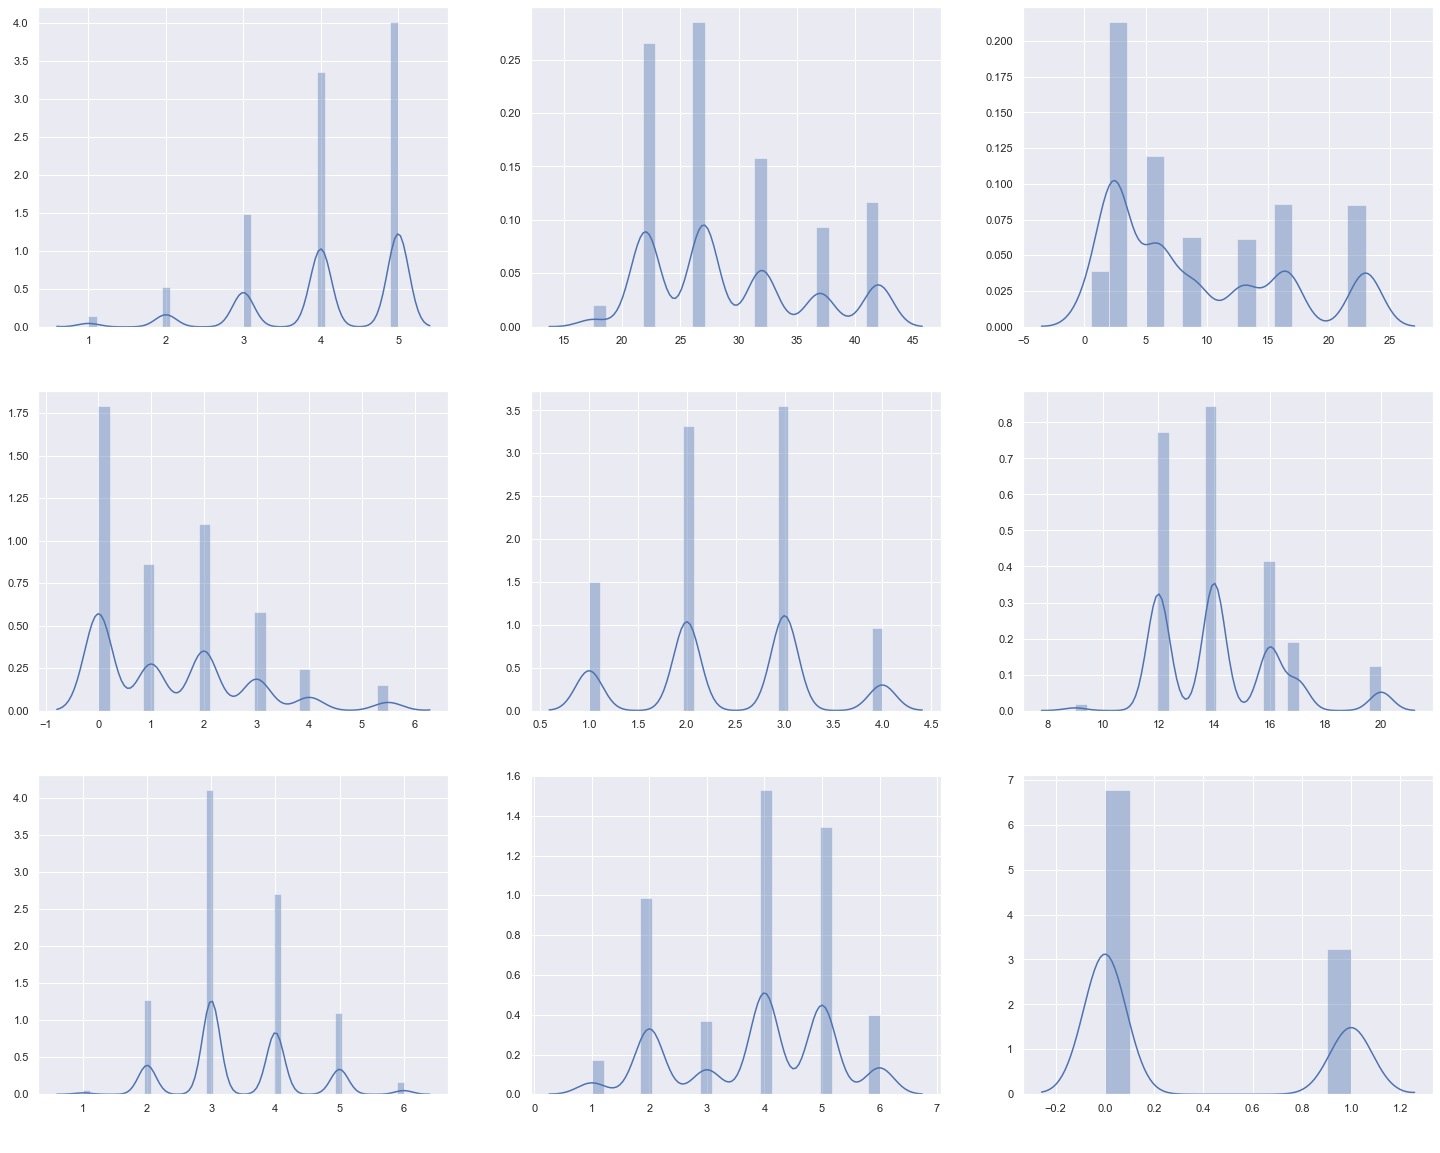

In [7]:
#let's see how data is distributed in every column
plt.figure(figsize=(25,20))
plotnumber=1
for column in data:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=30,color='white')
    plotnumber +=1
plt.show()    

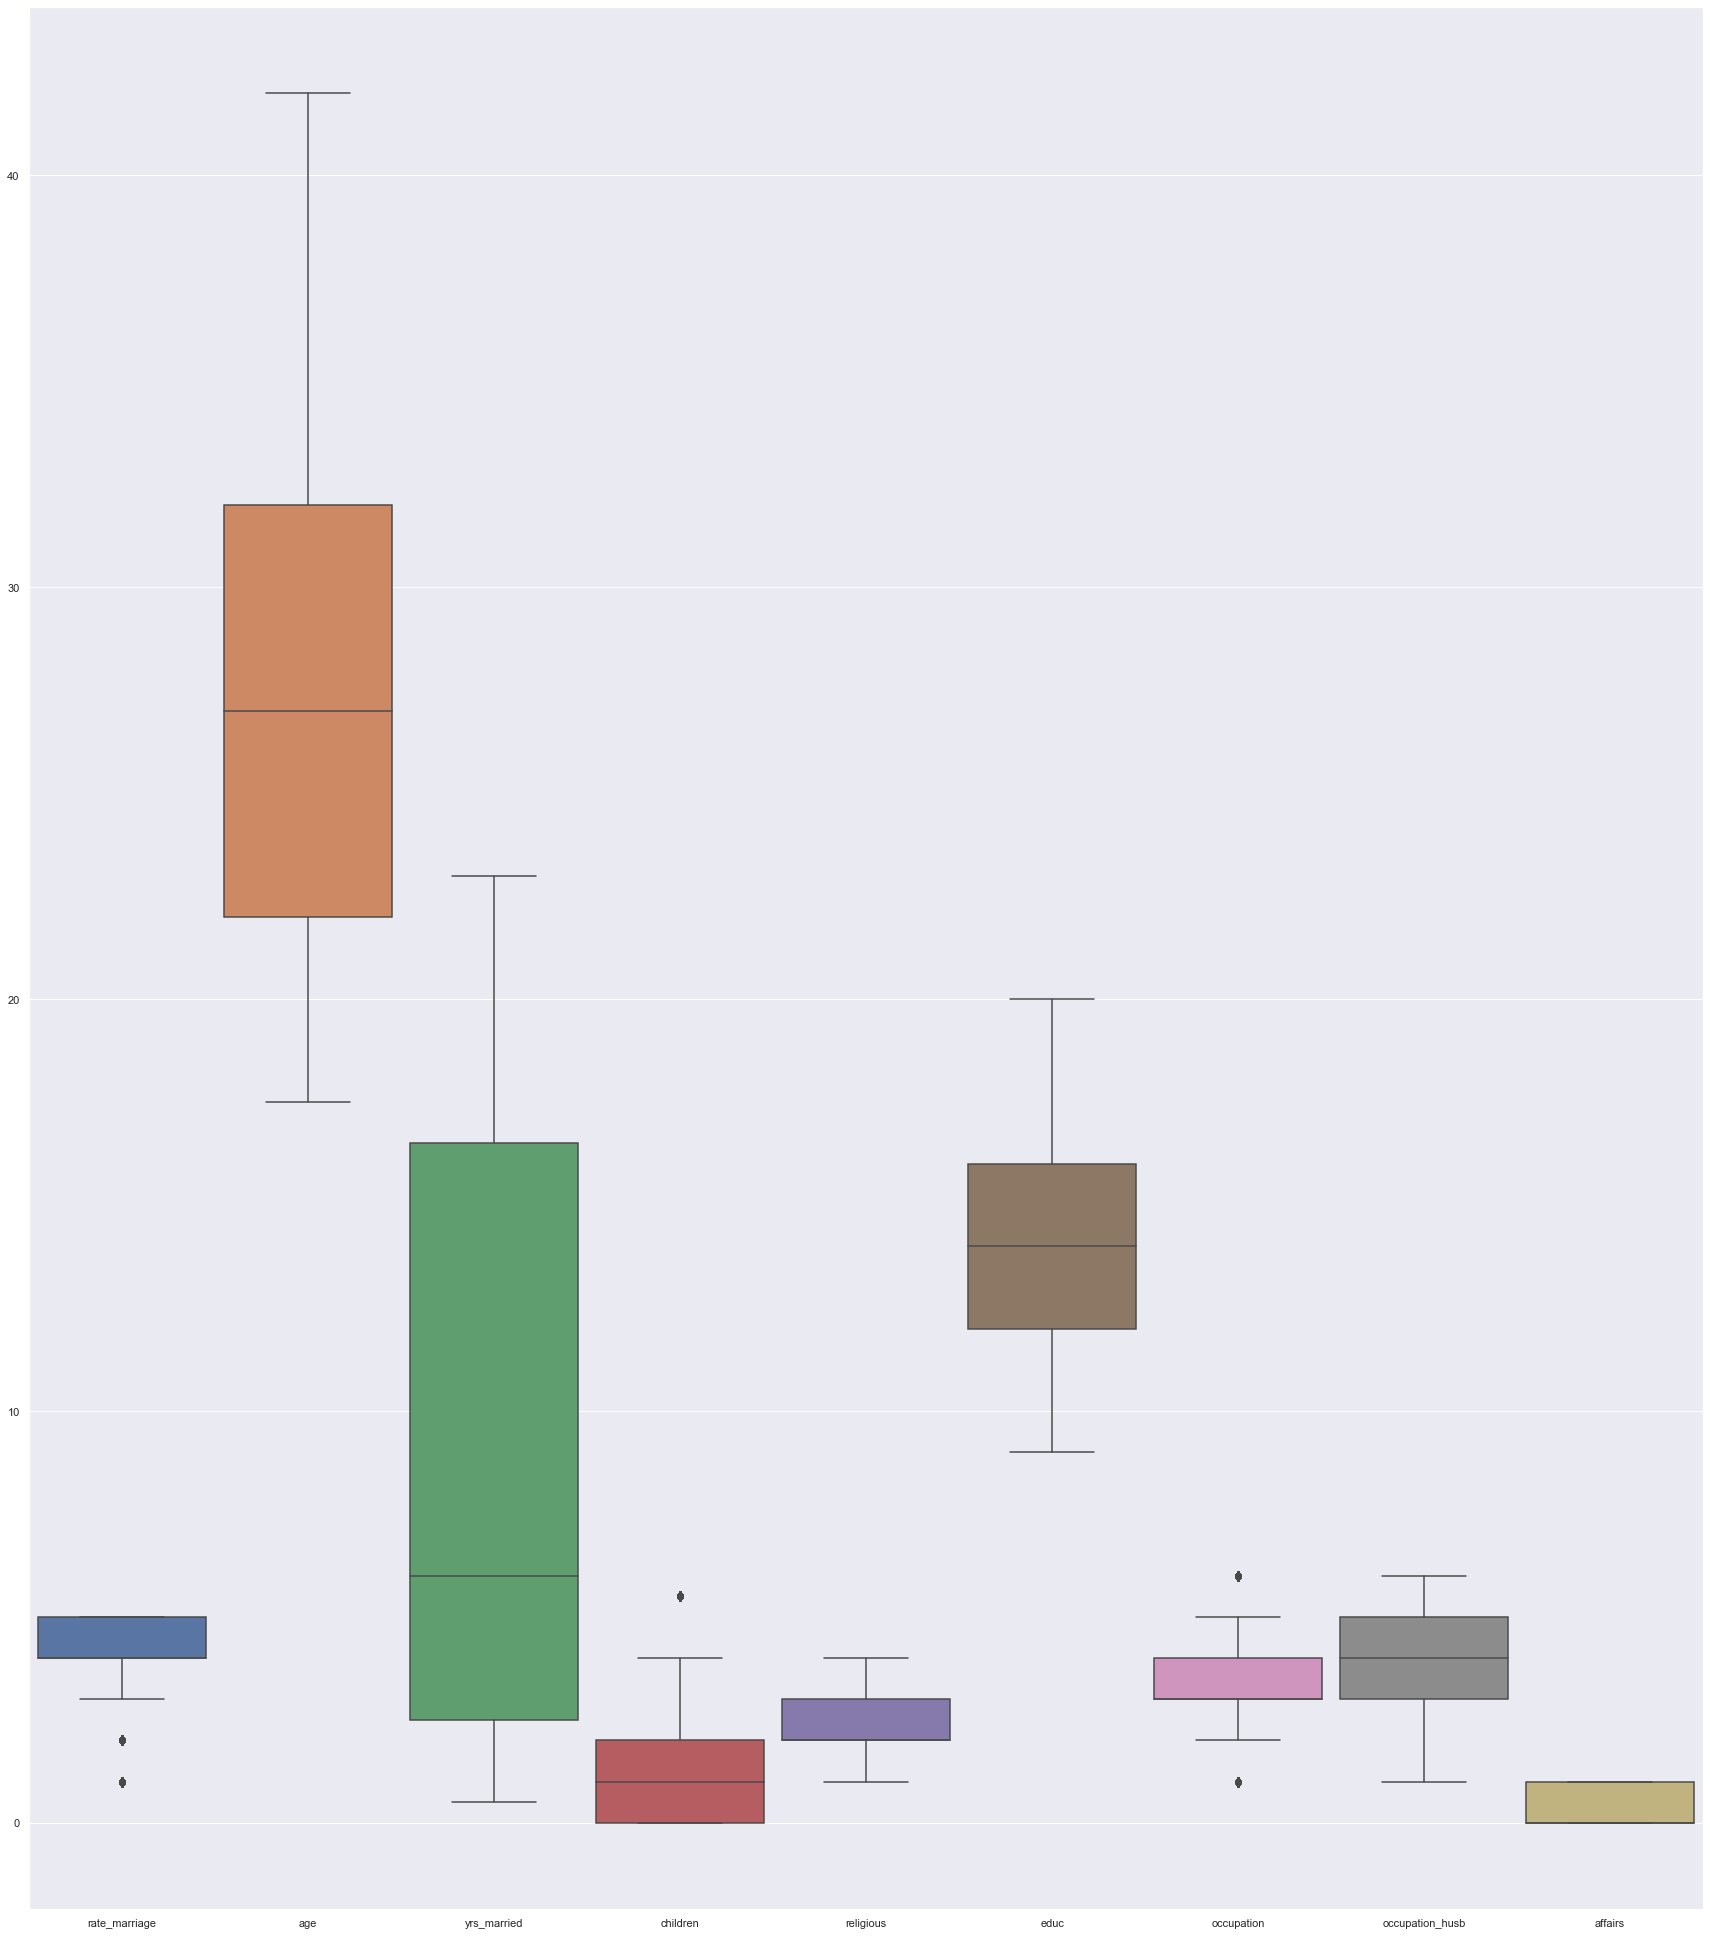

In [8]:
fig,ax=plt.subplots(figsize=(30,35))
sns.boxplot(data=data,ax=ax,width=0.9,fliersize=7)

## pairplot

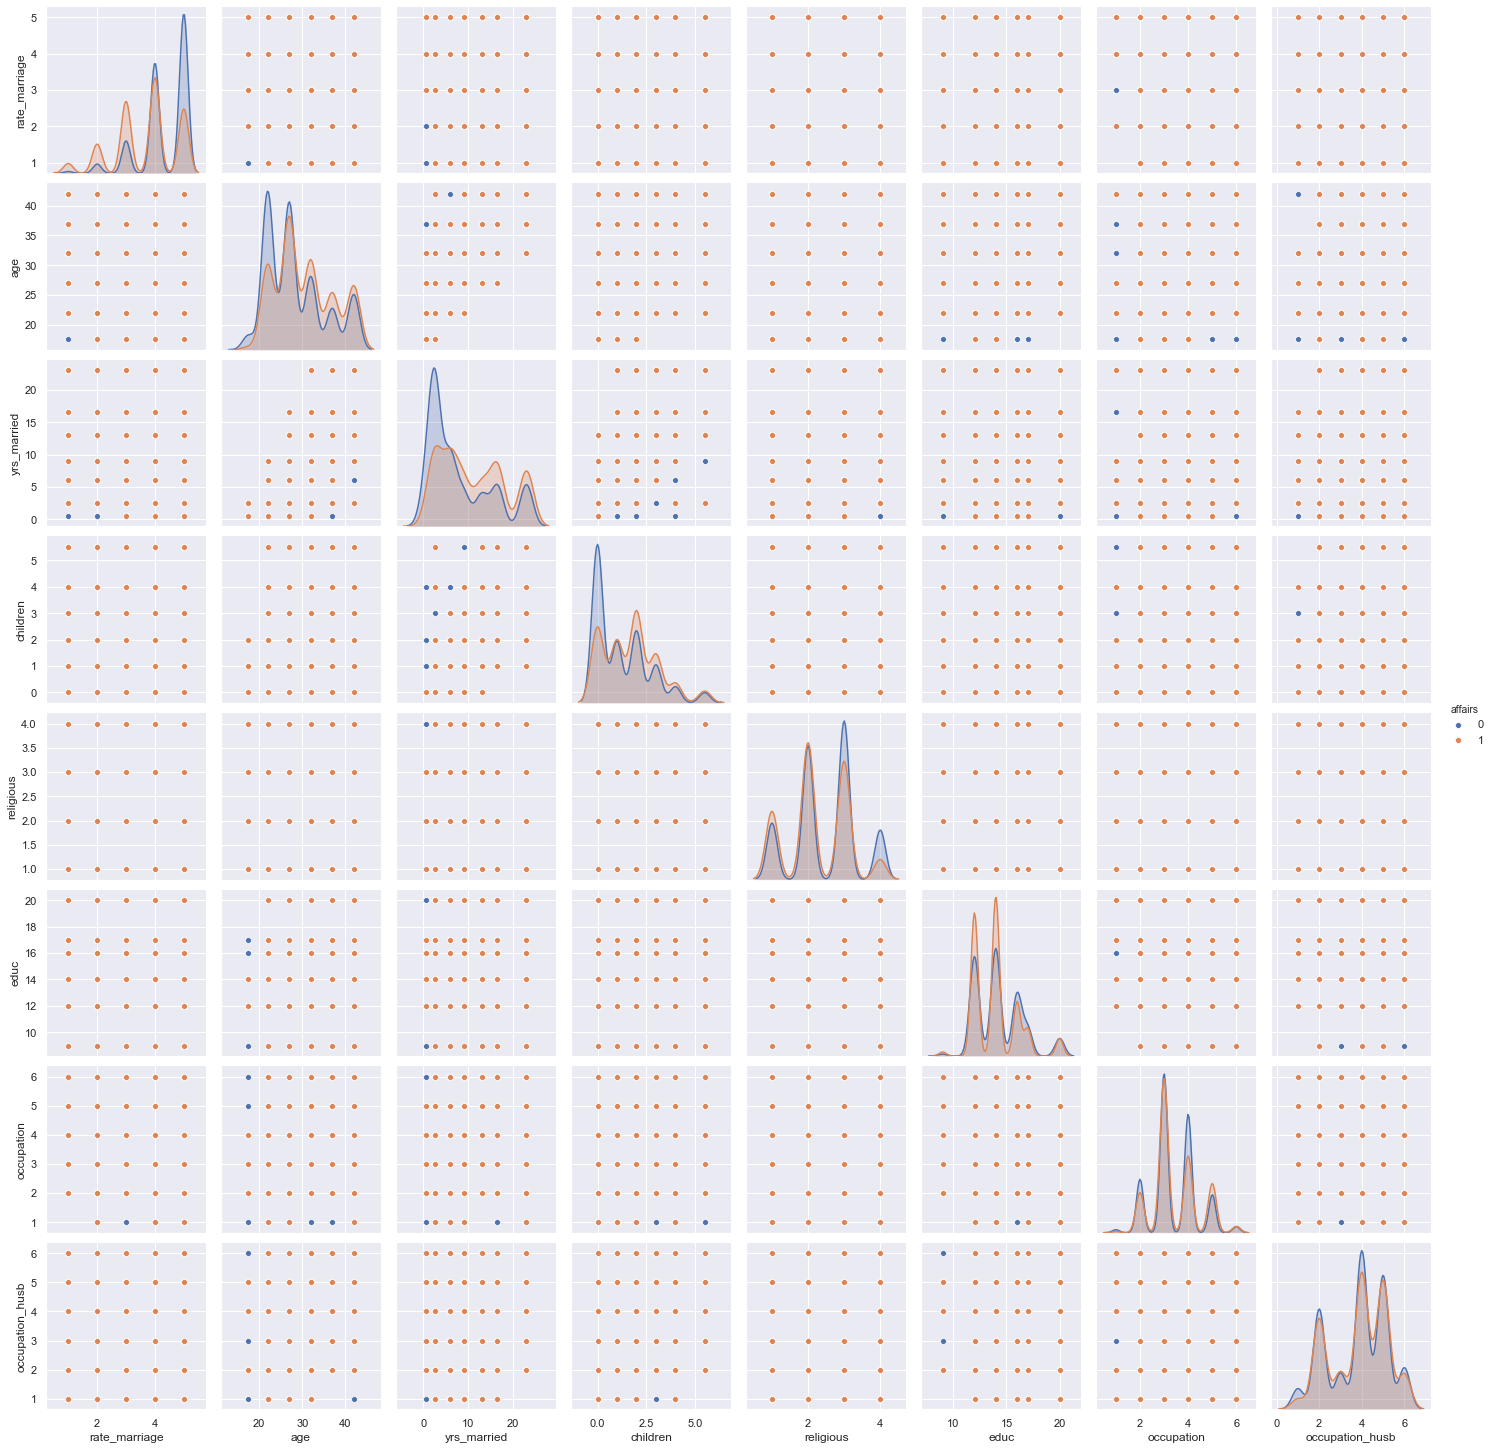

In [9]:
p=sns.pairplot(data=data,hue='affairs')

## Heatmap


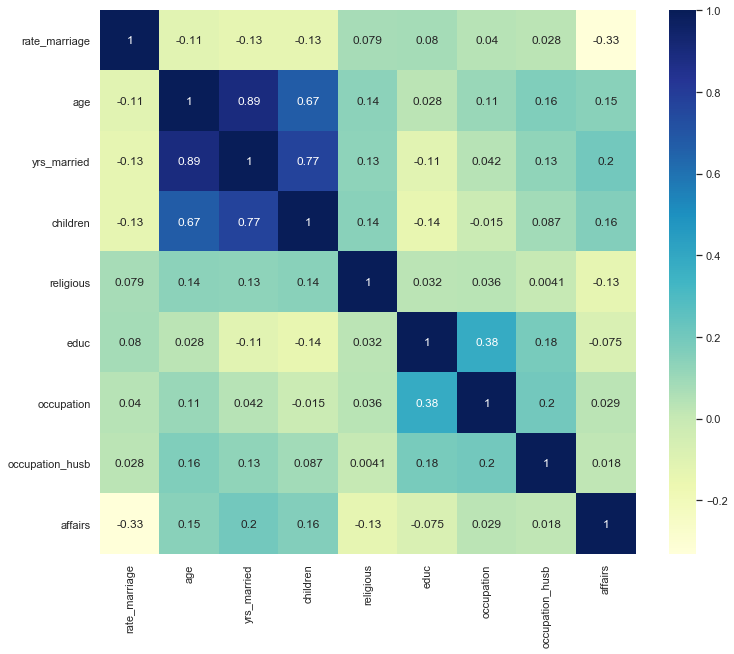

In [10]:
plt.figure(figsize=(12,10))
p=sns.heatmap(data.corr(),annot=True,cmap ='YlGnBu')

In [11]:
data.columns

Index(['rate_marriage', 'age', 'yrs_married', 'children', 'religious', 'educ',
       'occupation', 'occupation_husb', 'affairs'],
      dtype='object')

In [12]:
x=data[['rate_marriage','age','children','religious','educ','occupation','occupation_husb']]
y=data['affairs']


In [13]:
x.shape

(6366, 7)

In [14]:
y.shape

(6366,)

In [15]:
data

,rate_marriage,age,yrs_married,children,religious,educ,occupation,occupation_husb,affairs
0,3.0,32.0,9.0,3.0,3.0,17.0,2.0,5.0,1
1,3.0,27.0,13.0,3.0,1.0,14.0,3.0,4.0,1
2,4.0,22.0,2.5,0.0,1.0,16.0,3.0,5.0,1
3,4.0,37.0,16.5,4.0,3.0,16.0,5.0,5.0,1
4,5.0,27.0,9.0,1.0,1.0,14.0,3.0,4.0,1
...,...,...,...,...,...,...,...,...,...
6361,5.0,32.0,13.0,2.0,3.0,17.0,4.0,3.0,0
6362,4.0,32.0,13.0,1.0,1.0,16.0,5.0,5.0,0
6363,5.0,22.0,2.5,0.0,2.0,14.0,3.0,1.0,0
6364,5.0,32.0,6.0,1.0,3.0,14.0,3.0,4.0,0


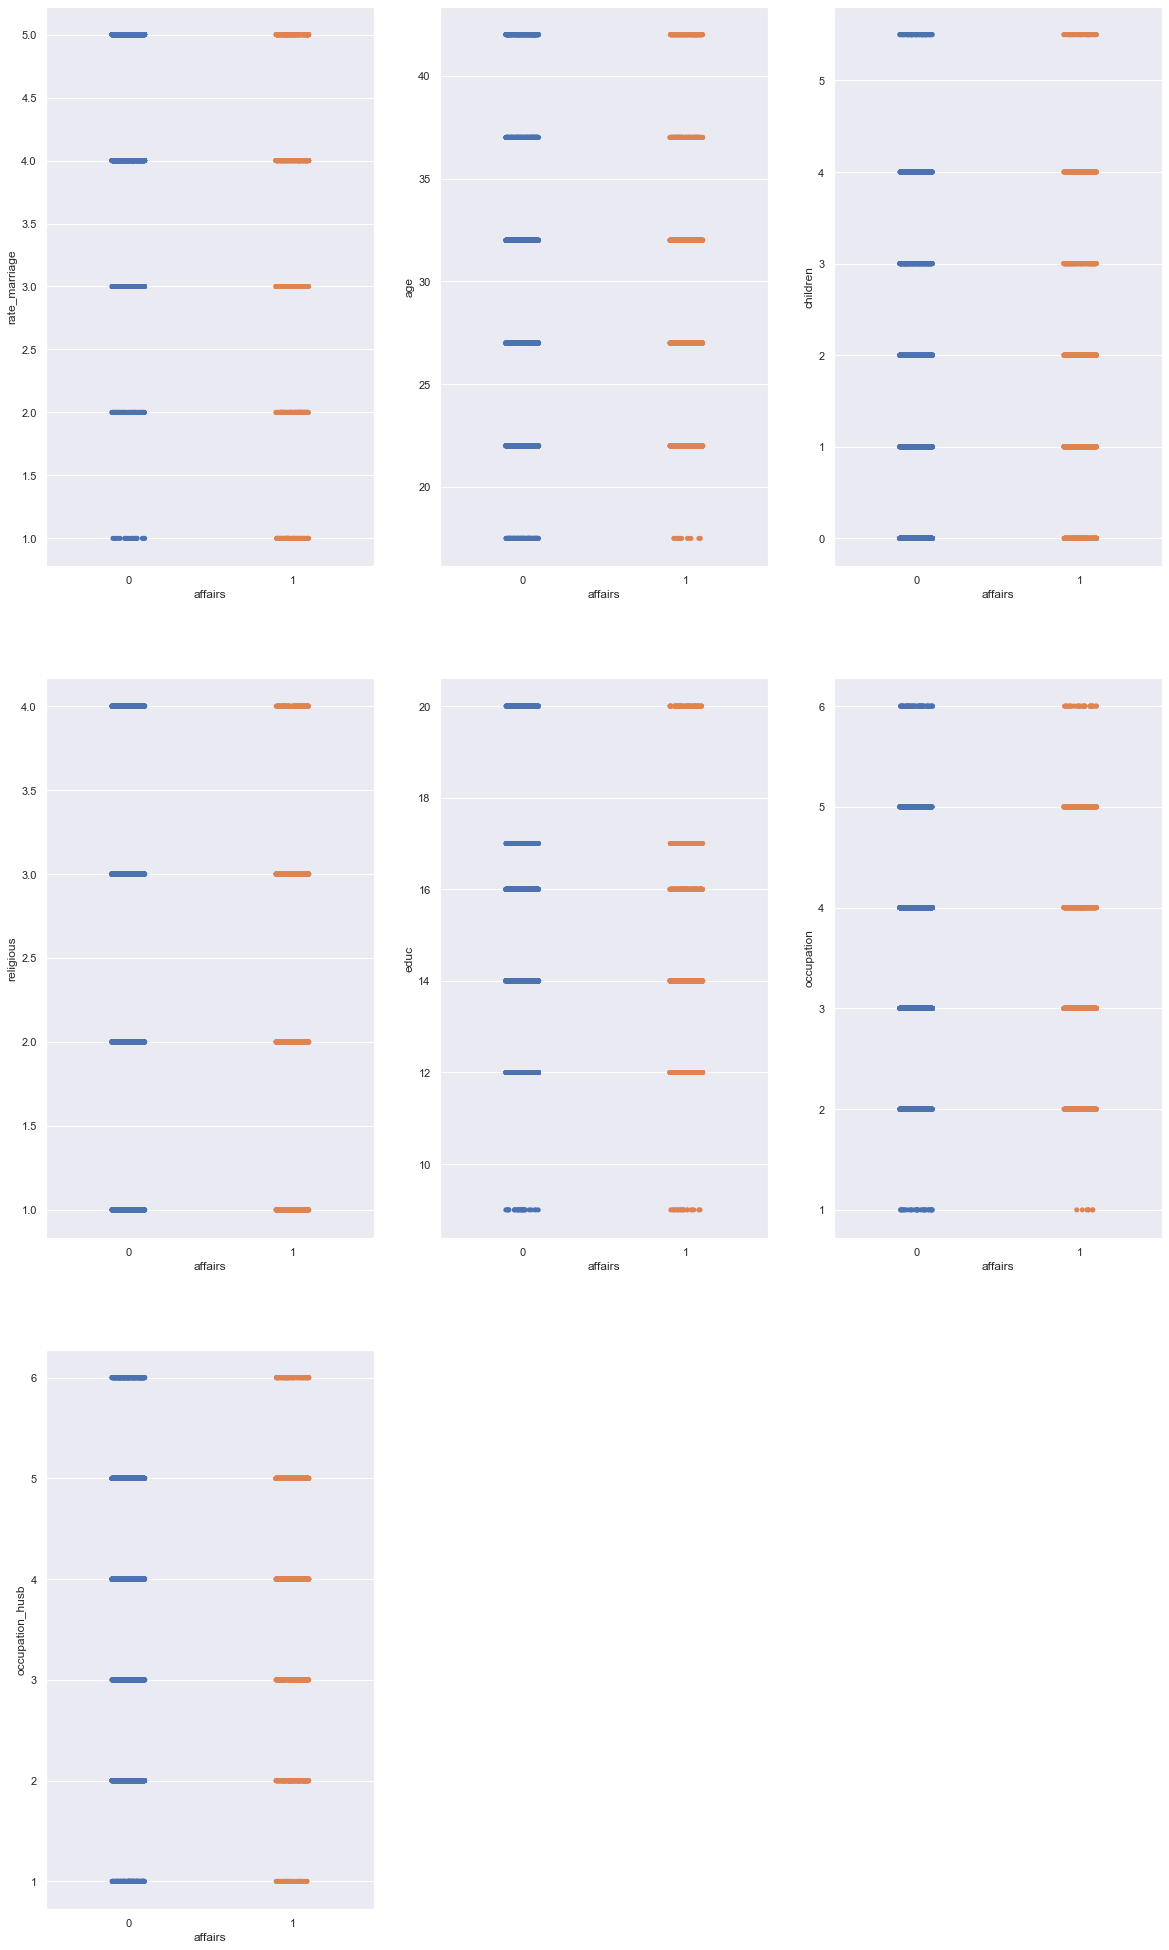

In [16]:
#lets see how data is distributed for every column
plt.figure(figsize=(20,35),facecolor='white')
plotnumber=1

for column in x:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.stripplot(y,x[column])
    plotnumber+=1
  
plt.show()    

### Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_scaled=scaler.fit_transform(x)
x_scaled

array([[-1.15425213,  0.42602474,  1.11844056, ...,  1.28115287,
        -1.51129246,  0.85406912],
       [-1.15425213, -0.3041854 ,  1.11844056, ..., -0.09636416,
        -0.4500871 ,  0.11130901],
       [-0.11405266, -1.03439554, -0.97454634, ...,  0.82198052,
        -0.4500871 ,  0.85406912],
       ...,
       [ 0.92614681, -1.03439554, -0.97454634, ..., -0.09636416,
        -0.4500871 , -2.11697133],
       [ 0.92614681,  0.42602474, -0.27688404, ..., -0.09636416,
        -0.4500871 ,  0.11130901],
       [-0.11405266, -1.03439554, -0.97454634, ...,  0.82198052,
        -1.51129246,  0.11130901]])

In [18]:
x_scaled.shape

(6366, 7)

In [19]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor(x_scaled,i) for i in range(x_scaled.shape[1])]
vif['features']=x.columns
vif

,vif,features
0,1.034432,rate_marriage
1,1.934505,age
2,1.945969,children
3,1.036904,religious
4,1.237633,educ
5,1.206647,occupation
6,1.082696,occupation_husb


###  All the VIF values are less than 5 and very low, that means no multicollinearity .

In [41]:
#splitting data

x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.20,random_state=30)

In [42]:
x_train.shape

(5092, 7)

In [43]:
y_train.shape

(5092,)

In [44]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [45]:
import pickle

with open('modelforprediction.sav','wb') as f:
    pickle.dump(log_reg,f)

with open('StandardScaler.sav','wb') as f:
    pickle.dump(scaler,f)

In [46]:
# Let's see how well our model performs on the test data set
y_pred=log_reg.predict(x_test)

In [47]:
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.7448979591836735

##### confusion martix

In [48]:
conf_mat= confusion_matrix(y_test,y_pred)
conf_mat

array([[817,  76],
       [249, 132]], dtype=int64)

In [49]:
true_positive=conf_mat[0][0]
false_positive=conf_mat[0][1]
false_negative=conf_mat[1][0]
true_negative=conf_mat[1][1]

In [50]:
# Breaking down the formula for Accuracy
Accuracy = (true_positive + true_negative) / (true_positive +false_positive + false_negative + true_negative)
Accuracy

0.7448979591836735

In [55]:
#precision
Precision= true_positive/(true_positive+false_positive)
Precision

0.9148936170212766

In [56]:
# Recall
Recall=true_positive/(true_positive+false_negative)
Recall

0.7664165103189493

In [57]:
# F1 Score
F1_Score = 2*(Recall * Precision) / (Recall + Precision)
F1_Score

0.8340990301174069

In [59]:
# area_under_curve
auc=roc_auc_score(y_test,y_pred)
auc

0.6306751549673312

#### ROC

In [60]:
fpr,tpr, thresholds= roc_curve(y_test,y_pred)

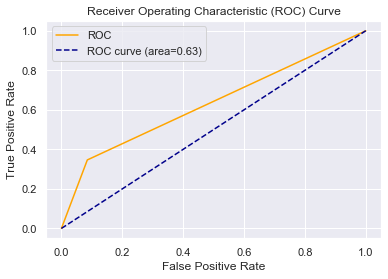

In [70]:
plt.plot(fpr,tpr, color='orange',label='ROC')
plt.plot([0,1],[0,1], color='darkblue',linestyle='--',label='ROC curve (area=%0.2f)' %auc)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()